# TP 8 Distribution Gaussienne
Dans ce TP, nous aimerions explorer le classifieur base sur les distributions gaussiennnes pour une classification binaire.



# Importation des librairies necessaires au travail

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from sklearn.metrics import f1_score
from mpl_toolkits.mplot3d import axes3d  # Fonction pour la 3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
plt.style.use('ggplot')

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [29]:
# données
X = np.genfromtxt('data/gaussian/X.csv', delimiter=',', dtype=float)
X.shape

(307, 2)

Dans ces données (data), les 2 premières colonnes representent les caracteristiques de l'ensemble d'entrainement.

Chaque ligne represente un exemple de notre ensemble de données. 


# Entrainement 
dans cette partie nous allons calculer les parametres de la disribution gaussienne de chaque caracteristique.

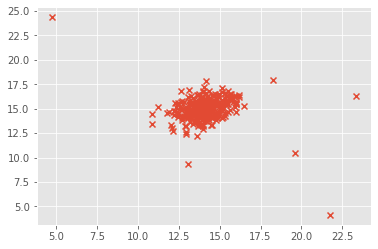

In [30]:
plt.scatter(X[:,0],X[:,1], marker ='x')

Mettons un lien avec ce que nous avons appris en regression linéaire

In [31]:
m = np.mean(X, axis=0)
v = np.var(X, axis=0)

In [32]:
def calculProba(X,m,v):
    return (1 / (np.sqrt(2 * v * np.pi))) * np.exp(- np.power(X - m, 2) / (2 * v))

In [33]:
prob = calculProba(X, m, v)

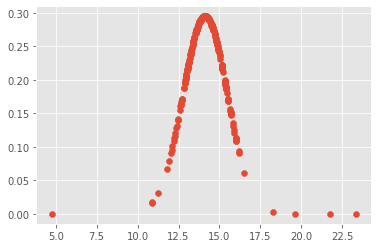

In [34]:
plt.scatter(X[:,0],prob[:,0])

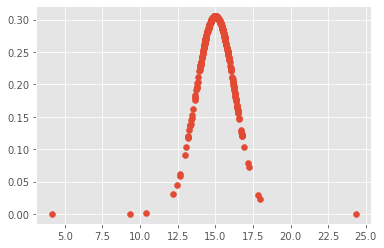

In [35]:
plt.scatter(X[:,1],prob[:,1])

In [36]:
yprob=prob[:,0]*prob[:,1]

ValueError: Argument Z must be 2-dimensional.

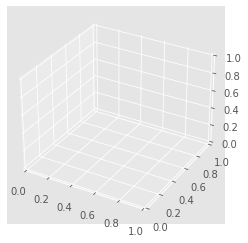

In [54]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
#ax = fig.gca()  # Affichage en 3D
ax.plot_surface(X[:,0], X[:,1], yprob, cmap=cm.coolwarm, linewidth=0)

Je ne sais pas pourquoi la visualisation 3D ne fonctionne pas...

In [37]:
X = np.genfromtxt('data/gaussian/Xval.csv', delimiter=',', dtype=float)
y = np.genfromtxt('data/gaussian/yval.csv', delimiter=',', dtype=float)[:, np.newaxis]

In [38]:
X.shape, y.shape

((307, 2), (307, 1))

In [44]:
m = np.mean(X, axis=0)
v = np.var(X, axis=0)

In [45]:
proba = calculProba(X, m, v)
yproba = proba[:,0]*proba[:,1]

In [46]:
f1_scores = []
proba = calculProba(X, m, v)
yproba = proba[:,0]*proba[:,1]
for epsilon in np.arange(0, 1, 0.0001):
    y_pred = np.ones(yproba.shape)
    y_pred[yproba >= epsilon] = 0
    f1_scores.append((epsilon, f1_score(y, y_pred)))

In [47]:
threshold = list(sorted(f1_scores, key=lambda x: x[1], reverse=True))[0]
threshold

(0.0002, 0.8750000000000001)

# 〰 Multigaussiennes 

In [49]:
def calculProbaMulti(X):
    cov = np.cov(X.T)
    m = np.mean(X, axis=0)
    return (1 / np.sqrt(2 * np.pi * np.linalg.det(cov))) * np.exp((- 1 / 2) * (((X - m) @ np.linalg.inv(cov)) * (X - m)).sum(axis=1))[:, np.newaxis]

In [50]:
proba_multi = calculProbaMulti(X)

In [51]:
f1_scores = []
yproba = calculProbaMulti(X)
for epsilon in np.arange(0, 1, 0.0001):
    y_pred = np.ones(yproba.shape)
    y_pred[yproba >= epsilon] = 0
    f1_scores.append((epsilon, f1_score(y, y_pred)))

In [52]:
threshold = list(sorted(f1_scores, key=lambda x: x[1], reverse=True))[0]
threshold

(0.0001, 0.8750000000000001)

# 🎩Naive Bayes

In [58]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [61]:
gnb = GaussianNB()

In [62]:
y_pred = gnb.fit(X_train, y_train).predict(X_test)

c:\Users\kawaremu\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [71]:
print("Number of mislabeled points out of a total {} points : {}".format(X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 154 points : 758


# Travail à faire
- 1) Nous aimerions bien choisir le epsilon, ceci est fait en analysant le score F1 obtenu precedenmment
- 2) nous aimerions appliquer une gaussienne multivariée à nos caracterisqtues; et comparer les deux résultats (multiplication des gaussiennes univariées, et gaussienne multivariée)
- 3) Nous aimerions visualiser en 3D la multiplication des gaussiennes univariées et la gaussienne multivariée pour comparaison. 
- 4) **** En Bonus - PAS obligatoire **** : nous aimerions utiliser la loi de Bayes afin de classifier nos exemples. Pour cela, voir le cours.
